In [1]:
import pickle
from matplotlib import pyplot as plt
import numpy as np 
import scipy.stats
import os

#https://stackoverflow.com/questions/15033511/compute-a-confidence-interval-from-sample-data
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n - 1)
    return m, m - h, m + h

def set_dict_entry(dictionary, keys, value):
    for key in keys[:-1]:
        dictionary = dictionary.setdefault(key, {})
    dictionary[keys[-1]] = value
    
def dict_iterator(dictionary, keys=None):
    if keys is None:
        keys = []
    for key, value in dictionary.items():
        new_keys = keys + [key]
        if isinstance(value, dict):
            for pair in dict_iterator(value, keys=new_keys):
                yield pair
        else:
            yield [new_keys, value]
            
def get_CI(dictionary):
    to_return = {}
    for val in dict_iterator(dictionary):
        utilities = val[1]
        set_dict_entry(to_return, val[0], mean_confidence_interval(utilities))
    return to_return

In [17]:
dir = 'Results/'
results = {}
for file in os.scandir(dir):
    if file.name.endswith('.p'):
        tokens = file.name[:-2].split('_')
        with open(os.path.join(dir, file.name), 'rb') as input_file:
            value = pickle.load(input_file)
        set_dict_entry(results, [tokens[0], tokens[-1]], value)
print(results)

CI_dict = get_CI(results)

print(CI_dict)              

{'leap': {'1000': [0.08211803436279297, 0.08043456077575684, 0.08183479309082031, 0.08464360237121582, 0.06075286865234375, 0.058389902114868164, 0.05856823921203613, 0.05959296226501465, 0.05766654014587402, 0.0588986873626709, 0.05933880805969238, 0.05847930908203125, 0.058103084564208984, 0.05811429023742676, 0.05840635299682617, 0.058617353439331055, 0.05887484550476074, 0.059108734130859375, 0.058339834213256836, 0.058693885803222656, 0.05950117111206055, 0.05774211883544922, 0.060097694396972656, 0.058936119079589844, 0.05833077430725098, 0.0580601692199707, 0.06092500686645508, 0.060054779052734375, 0.05815267562866211, 0.059055328369140625, 0.05835461616516113, 0.0588839054107666, 0.060370445251464844, 0.05910491943359375, 0.05892348289489746, 0.05834841728210449, 0.05907297134399414, 0.05694270133972168, 0.05830788612365723, 0.05894589424133301, 0.06074810028076172, 0.05860280990600586, 0.059456825256347656, 0.05892348289489746, 0.05896949768066406, 0.05830788612365723, 0.0588

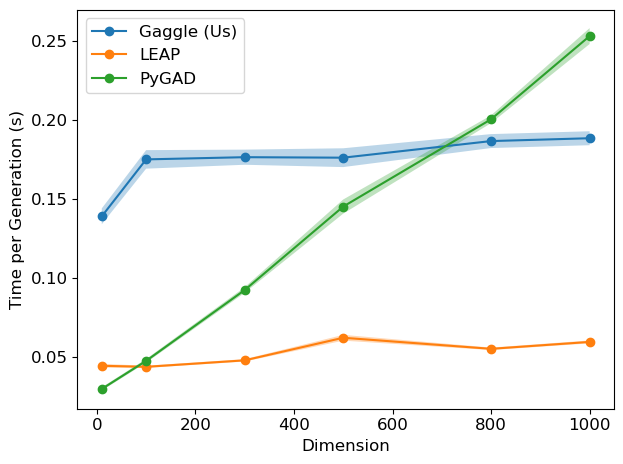

<Figure size 640x480 with 0 Axes>

In [23]:
dimesions = [10, 100, 300, 500, 800, 1000]
plt.rcParams.update({'font.size': 12})

nice_names = {'gaggle':'Gaggle (Us)', 'leap': 'LEAP', 'pygad': 'PyGAD'}
for algorithm in nice_names:
    result = CI_dict[algorithm]
    values = [result[str(x)][0] for x in dimesions]
    lower = [result[str(x)][1] for x in dimesions]
    upper = [result[str(x)][2] for x in dimesions]
    plt.plot(dimesions, values, label=nice_names[algorithm], marker='o')
    plt.fill_between(dimesions, lower, upper, alpha=0.3)
        
# plt.title("{} Dataset".format(dataset))
plt.xlabel("Dimension")
plt.ylabel("Time per Generation (s)")
plt.tight_layout()
plt.legend()
plt.plot()
plt.savefig('Results/rast_plot.png', bbox_inches='tight')
plt.show()
plt.clf()